# Trabajo Práctico 1 : Propiedades en Venta

### 1. Análisis Exploratorio y Preprocesamiento de Datos

El primer paso consiste en la selección de los datos que se van a utilizar, se deben filtrar
únicamente los anuncios de propiedades de tipo vivienda ( Casa, PH y Departamento ) ubicados
en Capital Federal cuyo tipo de operación sea venta y su precio se encuentre en dólares (USD).
Se debe separar un conjunto de entrenamiento (80%) y un conjunto de test (20%).

In [286]:
%matplotlib inline

# Imports
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [287]:
# Load Data
properati_df = pd.read_csv("Datasets/properati_argentina_2021.csv")
properati_df.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,XZq2dFGxBiboHY3Bo/tqlw==,2021-09-09,2022-01-27,2021-09-09,-38.957632,-68.105443,Neuquén,NaN,NaN,NaN,NaN,Venta,Casa,6.0,NaN,NaN,206.0,NaN,NaN,Casa - Capital
1,8afoK+yMH/rnnlYiktwgNA==,2021-09-09,2021-10-23,2021-09-09,-34.888878,-56.092368,Montevideo,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,193.0,193.0,390000.0,USD,Casa - Malvín
2,iVaG5rBB47dd1Ya4BMXREA==,2021-09-09,2022-03-09,2021-09-09,-32.488717,-58.257499,Entre Ríos,NaN,NaN,NaN,NaN,Venta,Casa,NaN,NaN,110.0,45.0,47000.0,USD,Casa - Uruguay
3,QE1QVMWKAHWkd0qT0FtPWA==,2021-09-09,2022-01-27,2021-09-09,-34.900165,-54.808453,Maldonado,NaN,NaN,NaN,NaN,Venta,Casa,NaN,3.0,NaN,180.0,400000.0,USD,Casa - El Chorro
4,tJ5lSk7IysG/71OGhacNZA==,2021-09-09,2022-01-27,2021-09-09,-38.954528,-68.041862,Neuquén,NaN,NaN,NaN,NaN,Venta,PH,3.0,2.0,NaN,98.0,102000.0,USD,PH - Villa Farrell


##### Chequeo que no haya tipos de propiedades mal parseados/con errores

In [288]:
properati_df['property_type'].unique()

array(['Casa', 'PH', 'Departamento', 'Lote', 'Depósito', 'Otro',
       'Local comercial', 'Oficina', 'Casa de campo', 'Cochera'],
      dtype=object)

##### Chequeo que no haya ciudades ('place_l2') mal parseados

In [289]:
properati_df['place_l2'].unique()

array(['Neuquén', 'Montevideo', 'Entre Ríos', 'Maldonado',
       'Bs.As. G.B.A. Zona Norte', 'Córdoba', 'Mendoza',
       'Capital Federal', 'Canelones', 'Misiones', 'Santa Fe', 'Tucumán',
       'Bs.As. G.B.A. Zona Oeste', 'Salta', 'Bs.As. G.B.A. Zona Sur',
       'Buenos Aires Interior', 'San Juan', 'Michigan',
       'Buenos Aires Costa Atlántica', 'Chubut', 'Río Negro',
       'Corrientes', 'La Pampa', 'Colonia', 'San Luis', 'Jujuy',
       'Florida', 'Tierra Del Fuego', 'Santiago Del Estero',
       'Santa Catarina', 'Chaco', 'Rocha', 'Rio Grande do Norte',
       'Formosa', 'Catamarca', 'Santa Cruz', 'Rio de Janeiro',
       'São Paulo', 'Maryland', 'Miami', 'La Rioja', 'Pennsylvania',
       'California'], dtype=object)

##### Chequeo que no haya tipos de operación mal parseados

In [290]:
properati_df['operation'].unique()

array(['Venta', 'Alquiler', 'Alquiler temporal'], dtype=object)

##### Chequeo que no haya tipos de moneda mal parseados

In [291]:
properati_df['property_currency'].unique()

array([nan, 'USD', 'UYU', 'ARS', 'PEN', 'COP'], dtype=object)

Se omitirá el analisis de los valores nulos de 'property_currency'

In [292]:
# Filtro para seleccionar las propiedades que son del tipo Casa, PH o Departamento
propery_type_filter = properati_df.property_type.isin(['Casa', 'PH', 'Departamento'])

# Filtro para seleccionar las propiedades localizadas en Capital federal
place_is_caba = properati_df.place_l2 == 'Capital Federal'

# Filtro para seleccionar las propiedades que tienen por operacion la Venta
operation_is_venta = properati_df.operation == 'Venta'

# Filtro para seleccionar las propiedades en dolares
currency_is_usd = properati_df.property_currency == 'USD'

# Aplico los filtros sobre el dataset original
properati_df = properati_df.loc[currency_is_usd & operation_is_venta & place_is_caba & propery_type_filter]

Elimino las columnas que no interesan

 -  'place_l5' y 'place_l6' tienen todos sus valores en null
 -  'place_l2', 'operation' y 'property_currency' tienen un solo valor
 -  'id' y 'property_title' no aportan ninguna informacion que interese en este analisis

Si bien 'place_l4' tiene muchos valores en null, puede ser util para subdividir barrios

In [293]:
columns_drop = ['place_l5', 'place_l6', 'place_l2', 'operation', 'property_currency', 'id', 'property_title']
properati_df.drop(columns=columns_drop, inplace=True)


properati_df.reset_index(drop=True, inplace=True)

### Separacion entre set de entrenamiento y de test

In [294]:
x_cols = properati_df.columns.tolist()
x_cols.remove('property_price')

x_ds = properati_df[x_cols].copy()
y_ds = properati_df['property_price'].copy()

x_train, x_test, y_train, y_test = train_test_split(x_ds, y_ds, test_size=0.2, random_state=2)

# creamos un data frame que vincule x_train y y_train para el analisis exploratorio 
df_properati = x_train.copy()
df_properati['property_price'] = y_train

### Analisis Exploratorio

###### Fechas

Primero vamos a analizar las columnas: start_date, end_date y created_on.

- Ya que el precio no cambia durante la publicación (o por lo menos no se ve reflejado en este dataset), la columna 'end_date' presumimos que no afecta al precio por lo que la vamos a eliminar. </br>
- Vamos a analizar la relacion entre la fecha de inicio (start_date) y la fecha de creacion (created_on) que parecen ser redundantes, esto se cumpliria si tienen la misma informacion para todos o casi todos los casos

- Por ultimo para analizar la correlación entre fecha y precio voy a asumir que el día no tiene ningun efecto, y como solo estamos trabajando con publicaciones del 2021, el mes es lo unico que podria tener alguna correlación.

In [295]:
# Elimino la columna end_date
df_properati.drop(columns=['end_date'], inplace=True)

In [296]:
# Analizo si hay una diferencia entre start_date y created_on
dates = df_properati[['start_date', 'created_on']].copy()

for column in dates.columns:
    dates[column] = pd.to_datetime(dates[column], yearfirst=True)
    
dates_differ = dates['start_date'] == dates['created_on']
dates_differ.value_counts() / len(x_train)

True    1.0
dtype: float64

In [297]:
# Dado que tienen evidentemente la misma infomacion elimino created_on y me quedo con start_date
df_properati.drop(columns=['created_on'], inplace=True)

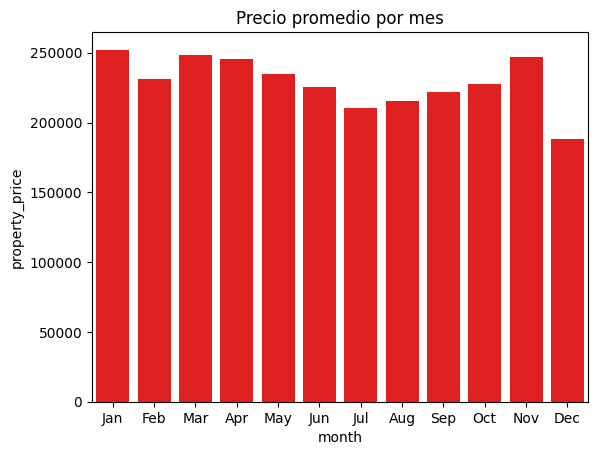

In [298]:
order_months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

df_properati['month'] = dates['start_date'].dt.strftime('%b')
price_by_month = df_properati.groupby('month', as_index=False)['property_price'].mean()

plt.title('Precio promedio por mes')

sns.barplot(x="month", y="property_price", data=price_by_month ,color="red", order=order_months)

plt.show()

Los precios parecen ser bastante uniformes respecto al mes. Creo que es seguro asumir que el mes (y por ende la fecha de creacion), no afecta significativamente el precio de la propiedad. Procedo a filtrar esa información del dataframe

In [299]:
df_properati.drop(columns=['start_date'], inplace=True)

###### Coordenadas

Vamos a analizar la relacion entre las coordenadas de la propiedad y el precio. 

A priori conociendo las particularidaddes de la Ciudad de Buenos Aires, presupongo que van a ser datos relavantes.



Analizaremos datos atipicos, no queremos que por error haya propiedades que esten fuera del area de la ciudad de buenos aires. Un dato MUY IMPORTANTE es que la ciudad de buenos aires se encuentra al rededor de la latitud 34° y de la longitud: 58°

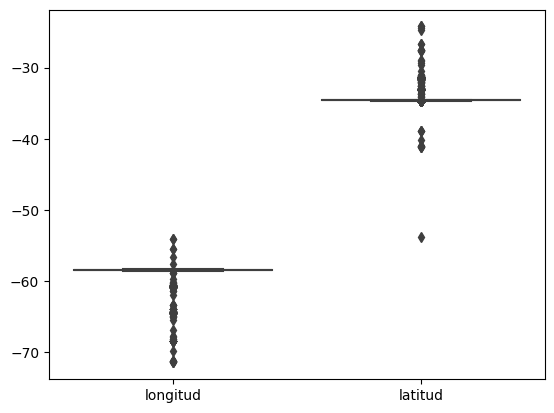

In [300]:
sns.boxplot(data=df_properati[["longitud", "latitud"]])
plt.show()

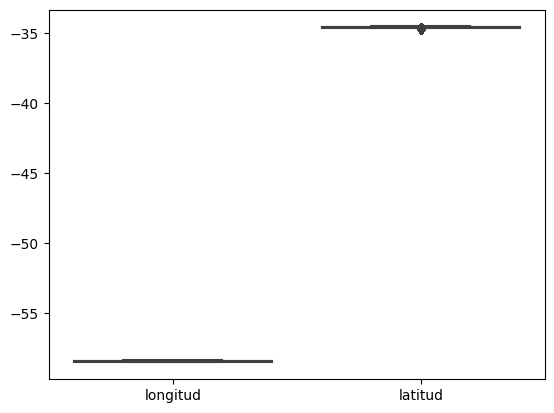

In [301]:
# Es evidente que hay propiedades localizadas por fuera de la ciudad de buenos aires por lo que vamos a filtrarlas

longitud_filter = (df_properati["longitud"] <= -58 ) & (df_properati["longitud"] > -59)
latitud_filter = (df_properati["latitud"] <= -34 ) & (df_properati["latitud"] > -35)
df_properati = df_properati[latitud_filter & longitud_filter]
sns.boxplot(data=df_properati[["longitud", "latitud"]])
plt.show()

Ahora los datos de latitud y longitud tienen mas que ver con los limites teoricos de la CABA

Vamos a analizar la correlacion entre las coordenadas y el precio.

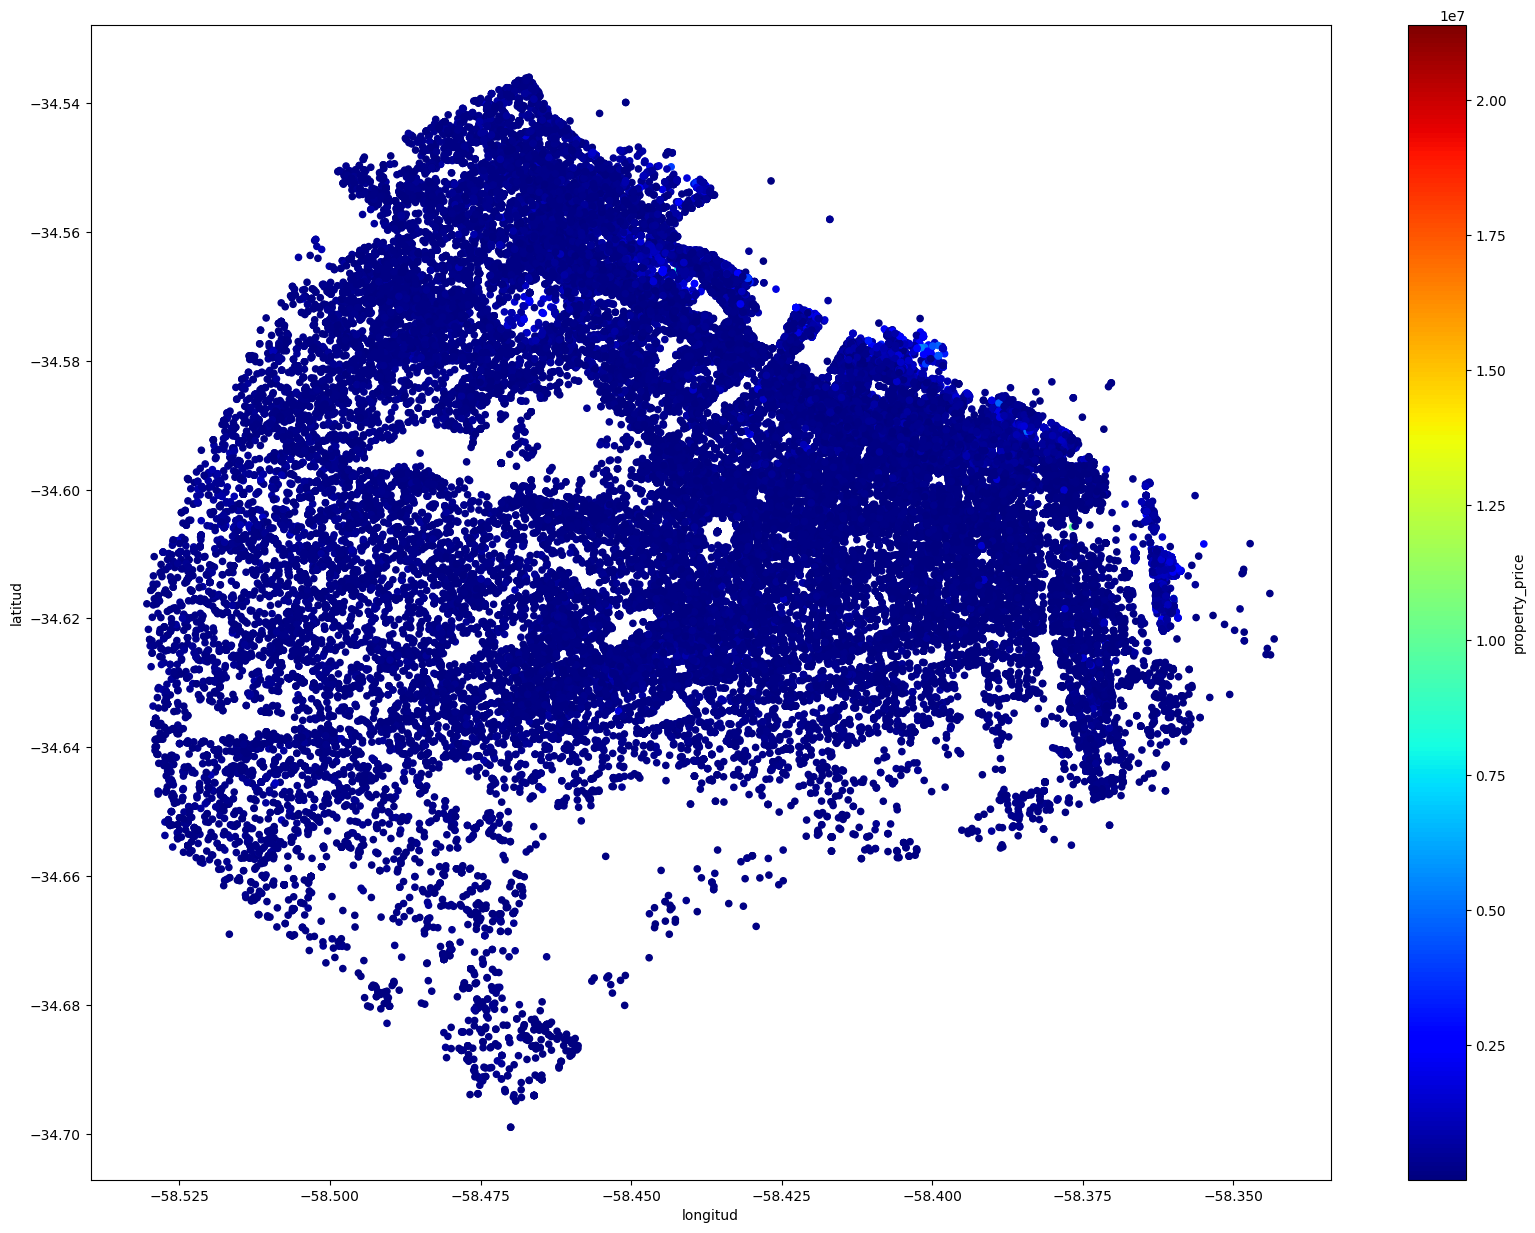

In [302]:
df_properati.plot(kind="scatter", x="longitud", y="latitud", c="property_price", figsize=(20,15),cmap=plt.get_cmap("jet"), colorbar=True)
plt.show()

###### Barrios

Las columnas place_l3 y place_l4, nos dan informacion sobre el barrio en el que esta localizada la propiedad, mas especificamente place_l3 hace referencia al barrio en concreto y place_l4 nos mustra alguna subcategoria del barrio en cuestion, en particular en este data set nos dice que si place_l3 es Palermo en algunos casos no en todos place_l4 nos dice que tipo de palermo es (palermo chico, palermo hollywood...).

Es probable que sea interesante ver si a la hora de entrenar nuestros modelos esta categoria le agrega informacion a las coordenadas.

Primero que nada vamos a tener una observacion general de los datos, enfocandonos en la variable place_l3

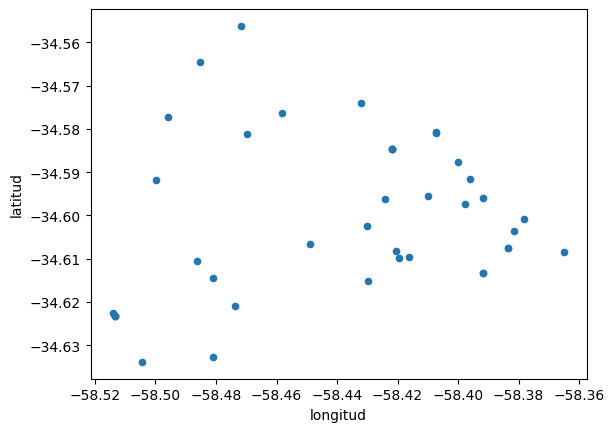

In [303]:
# Hago un grafico de coordenadas de las propiedades sin barrio
df_properati[df_properati.place_l3.isna()].plot(kind="scatter", x="longitud", y="latitud")
plt.show()

Dado que son pocas y se encuentran distribuidas de forma bastante uniforme vamos a eliminarlas.

In [304]:
df_properati = df_properati[df_properati.place_l3.notna()]

In [305]:
df_properati.place_l4.value_counts()

Palermo Hollywood    1074
Palermo Chico         817
Palermo Soho          556
Palermo Viejo         116
Name: place_l4, dtype: int64

Vamos a remplazar los datos de place_l3 por place_l4 cuando este no es null, esto lo hacemos por que cuando transformemos esta variable categorica utilizando el metodo de one hot encoding va a ser evidente la presencia de redundancias.

In [306]:
df_properati.loc[df_properati.place_l4.notna(),"place_l3"] = df_properati.loc[df_properati.place_l4.notna(), "place_l4"]

In [307]:
# Dropeamos la columna l4
df_properati = df_properati.drop(columns=['place_l4'])

In [308]:
# Renombramos la variable place_l3 a algo mas descriptivo: district
df_properati.rename(columns={"place_l3": "district"}, inplace=True)

In [310]:
df_properati.district.unique()

array(['Coghlan', 'Flores', 'Palermo', 'Once', 'San Telmo', 'Boca',
       'Recoleta', 'Barrio Norte', 'Balvanera', 'Belgrano', 'Caballito',
       'Agronomía', 'Palermo Hollywood', 'Paternal', 'Monserrat',
       'Saavedra', 'Parque Chacabuco', 'Almagro', 'Villa Urquiza',
       'Colegiales', 'Abasto', 'Nuñez', 'Retiro', 'Palermo Chico',
       'Villa Crespo', 'Pompeya', 'Villa Devoto', 'Villa Lugano',
       'Liniers', 'Villa del Parque', 'Palermo Viejo', 'Congreso',
       'Mataderos', 'Palermo Soho', 'Villa Luro', 'Barracas',
       'Puerto Madero', 'Parque Patricios', 'Monte Castro', 'San Nicolás',
       'Villa General Mitre', 'Chacarita', 'Boedo', 'Villa Ortuzar',
       'Floresta', 'Constitución', 'San Cristobal', 'Villa Pueyrredón',
       'Velez Sarsfield', 'Villa Real', 'Villa Santa Rita', 'Versalles',
       'Parque Chas', 'Parque Avellaneda', 'Parque Centenario',
       'Villa Soldati', 'Villa Riachuelo', 'Centro / Microcentro',
       'Tribunales', 'Las Cañitas', 'Catalin

In [316]:
df_properati.groupby('district')['property_price'].agg([np.mean, np.median])

,mean,median
district,,
Abasto,110793.044444,87000.0
Agronomía,164937.395722,148000.0
Almagro,129437.915453,112000.0
Balvanera,112923.336020,95000.0
Barracas,161866.342685,135000.0
...,...,...
Villa Riachuelo,129165.925926,125000.0
Villa Santa Rita,142830.385475,120000.0
Villa Soldati,107100.000000,92500.0


###### Tipo de propiedad

A priori no hay mucho que analizar en esta categoria dado que este data set se asegura de tener datos que solo tengan las categorias Departamento, PH y Casa por lo que datos faltantes no hay. 

Presuponemos a su vez que es un dato relevante por lo que solo vamos a ver la cantidad de ocurrencias de cada uno.

In [313]:
df_properati.property_type.value_counts()

Departamento    61817
PH               7293
Casa             3099
Name: property_type, dtype: int64

In [314]:
properati_df.groupby('property_type')['property_price'].agg([np.mean, np.median])

,mean,median
property_type,,
Casa,465170.175494,330000.0
Departamento,219680.407341,137000.0
PH,176328.538204,154000.0
